In [1]:
import pandas as pd
import numpy as np

In [147]:
import os

directory = '/Users/pinakshome/Downloads/store-sales-time-series-forecasting/'

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        df_name = os.path.splitext(filename)[0]  # Use the filename (without extension) as the DataFrame name
        globals()[df_name] = pd.read_csv(file_path)

<h1> <B> CYCLE ON TRAIN <B> </h1>

In [148]:
df_train1 = train

In [150]:
### Unique Values
df_train1.nunique()

id             3000888
date              1684
store_nbr           54
family              33
sales           379610
onpromotion        362
dtype: int64

In [151]:
############# No Duplicates
duplicates = df_train1[df_train1.duplicated()]

print("Duplicate rows:")
print(duplicates)

Duplicate rows:
Empty DataFrame
Columns: [id, date, store_nbr, family, sales, onpromotion]
Index: []


In [156]:
# Check for duplicates based on column combination
duplicates = df_train1[df_train1.duplicated(['date','family','store_nbr','sales','onpromotion'])]

print("Duplicate rows based on 'Column1' and 'Column2':")
print(duplicates)


Duplicate rows based on 'Column1' and 'Column2':
Empty DataFrame
Columns: [id, date, store_nbr, family, sales, onpromotion]
Index: []


In [56]:
df_train.head(-100)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000000,0
1,1,2013-01-01,1,BABY CARE,0.000000,0
2,2,2013-01-01,1,BEAUTY,0.000000,0
3,3,2013-01-01,1,BEVERAGES,0.000000,0
4,4,2013-01-01,1,BOOKS,0.000000,0
...,...,...,...,...,...,...
3000783,3000783,2017-08-15,6,PLAYERS AND ELECTRONICS,15.000000,0
3000784,3000784,2017-08-15,6,POULTRY,434.570000,0
3000785,3000785,2017-08-15,6,PREPARED FOODS,102.341995,0
3000786,3000786,2017-08-15,6,PRODUCE,2073.636000,5


In [ ]:
print(df_train.isnull().sum())

In [26]:
df_train.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [33]:
###Checking non-null values
df_train.count()

id             3000888
date           3000888
store_nbr      3000888
family         3000888
sales          3000888
onpromotion    3000888
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

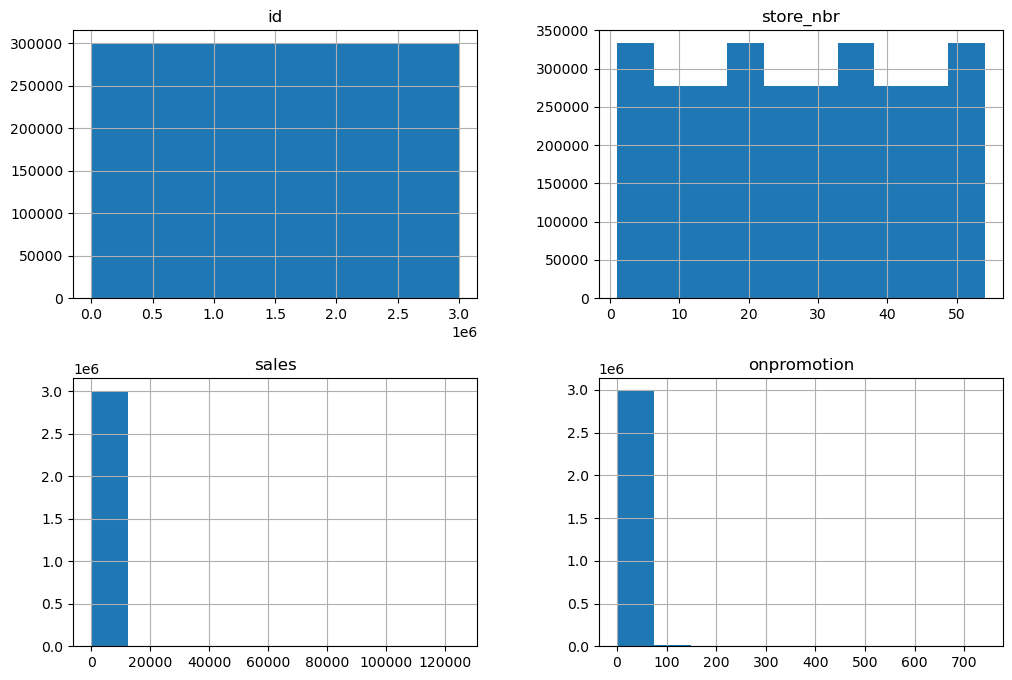

In [39]:
df_train.hist(figsize=(12, 8))
plt.show

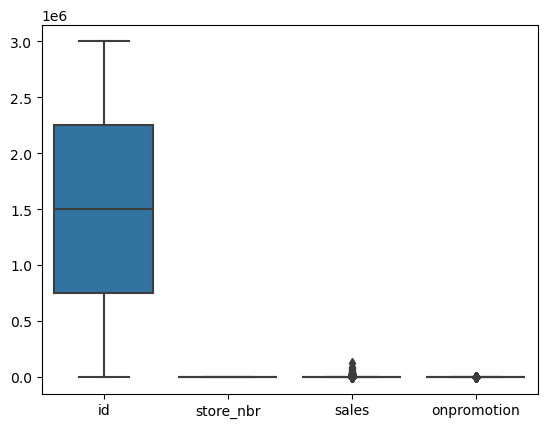

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df_train)
plt.show()

In [41]:
print(df_train['family'].value_counts())

family
AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION          

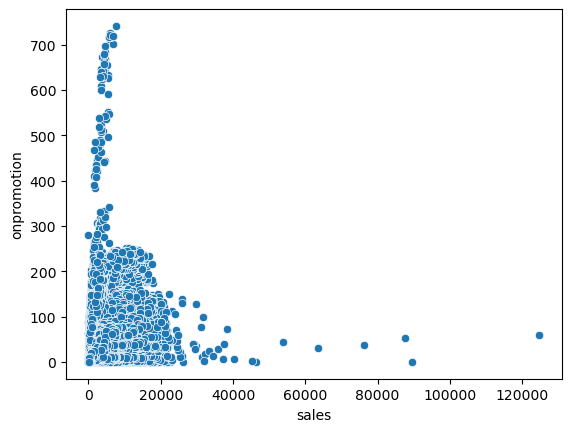

In [44]:
sns.scatterplot(x='sales', y='onpromotion', data=df_train)
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

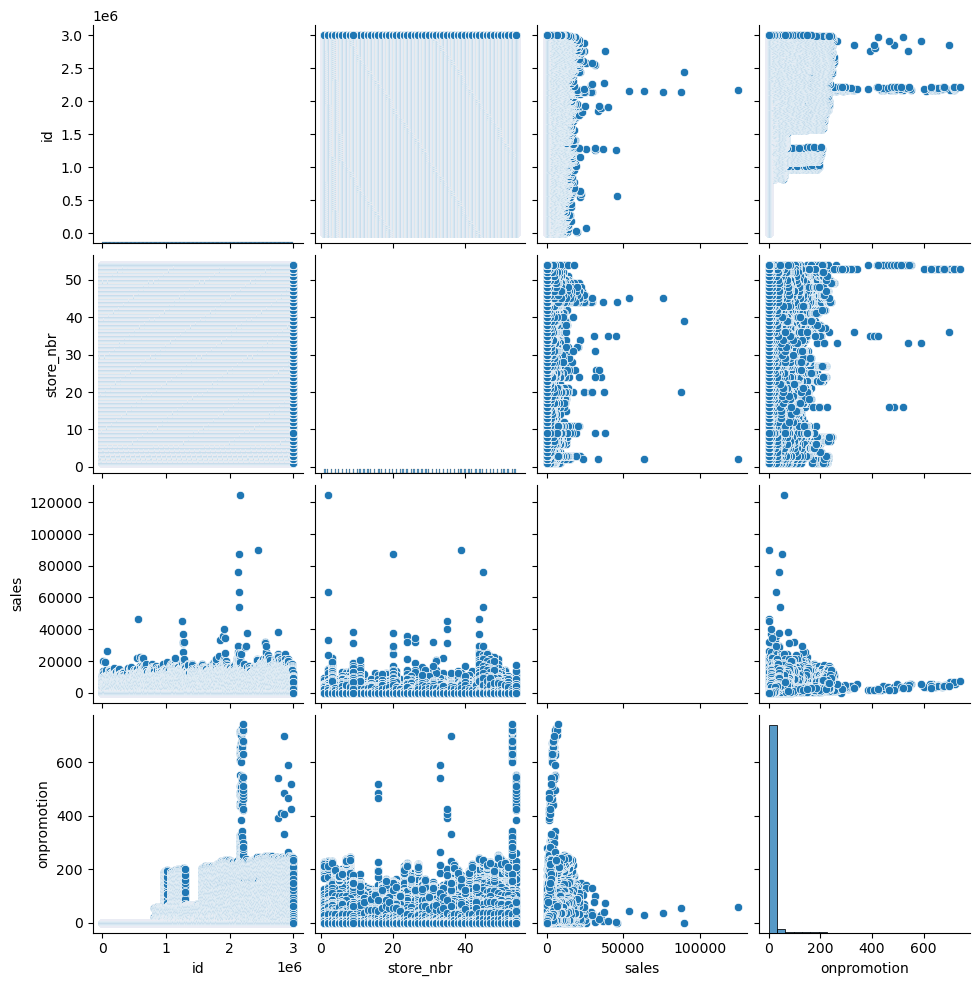

In [46]:
sns.pairplot(df_train)
plt.show()

In [50]:
from scipy import stats
z_scores = stats.zscore(df_train.select_dtypes(include=['float64', 'int64']))
outliers = (z_scores > 3).any(axis=1)
print(df_train[outliers])

              id        date  store_nbr     family     sales  onpromotion
1860        1860  2013-01-02         11  GROCERY I  7736.000            0
2091        2091  2013-01-02         18  GROCERY I  3756.000            0
2157        2157  2013-01-02          2  GROCERY I  3870.000            0
2322        2322  2013-01-02         24  GROCERY I  3920.000            0
2511        2511  2013-01-02          3  BEVERAGES  4486.000            0
...          ...         ...        ...        ...       ...          ...
3000819  3000819  2017-08-15          7    PRODUCE  5113.961            6
3000834  3000834  2017-08-15          8  GROCERY I  4035.000           34
3000852  3000852  2017-08-15          8    PRODUCE  3939.392           10
3000867  3000867  2017-08-15          9  GROCERY I  6630.383           62
3000885  3000885  2017-08-15          9    PRODUCE  2419.729          148

[102703 rows x 6 columns]


In [60]:
df_train.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dtype: object

In [85]:
df_train['date'] = pd.to_datetime(df_train['date'])

In [86]:
df_test['date'] = pd.to_datetime(test_df['date'])

# Create additional date-related features (year, month, day, day of week)
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day
df_train['dayofweek'] = df_train['date'].dt.dayofweek

df_test['year'] = df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month
df_test['day'] = df_test['date'].dt.day
df_test['dayofweek'] = df_test['date'].dt.dayofweek

# Display the first few rows after preprocessing
train_preprocessed_head = df_.head()
test_preprocessed_head = df_test.head()

train_preprocessed_head, test_preprocessed_head


(   id       date store_nbr      family  sales  onpromotion  year  month  day  \
 0   0 2013-01-01         1  AUTOMOTIVE    0.0            0  2013      1    1   
 1   1 2013-01-01         1   BABY CARE    0.0            0  2013      1    1   
 2   2 2013-01-01         1      BEAUTY    0.0            0  2013      1    1   
 3   3 2013-01-01         1   BEVERAGES    0.0            0  2013      1    1   
 4   4 2013-01-01         1       BOOKS    0.0            0  2013      1    1   
 
    dayofweek  
 0          1  
 1          1  
 2          1  
 3          1  
 4          1  ,
         id       date store_nbr      family  onpromotion  year  month  day  \
 0  3000888 2017-08-16         1  AUTOMOTIVE            0  2017      8   16   
 1  3000889 2017-08-16         1   BABY CARE            0  2017      8   16   
 2  3000890 2017-08-16         1      BEAUTY            2  2017      8   16   
 3  3000891 2017-08-16         1   BEVERAGES           20  2017      8   16   
 4  3000892 2017-08-

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Select features and target for training
y = df_train['sales']
df_train = df_train.drop(['sales'],axis = 1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(df_train, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Calculate the Mean Squared Error (MSE) for the validation set predictions
mse = mean_squared_error(y_val, y_val_pred)

mse

523864.739374515

In [114]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 92 columns):
 #   Column                             Dtype
---  ------                             -----
 0   onpromotion                        int64
 1   year                               int32
 2   month                              int32
 3   day                                int32
 4   dayofweek                          int32
 5   family_AUTOMOTIVE                  bool 
 6   family_BABY CARE                   bool 
 7   family_BEAUTY                      bool 
 8   family_BEVERAGES                   bool 
 9   family_BOOKS                       bool 
 10  family_BREAD/BAKERY                bool 
 11  family_CELEBRATION                 bool 
 12  family_CLEANING                    bool 
 13  family_DAIRY                       bool 
 14  family_DELI                        bool 
 15  family_EGGS                        bool 
 16  family_FROZEN FOODS                bool 
 17  family_G

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


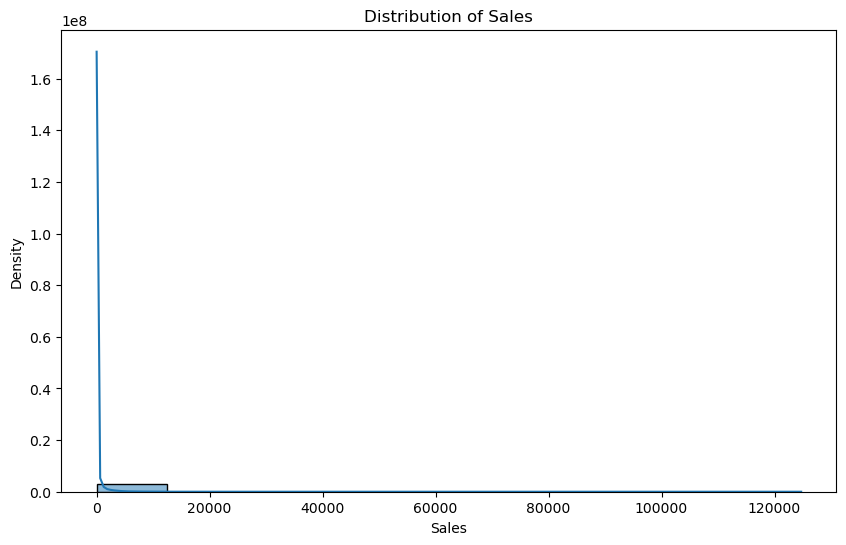

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=10, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.show()

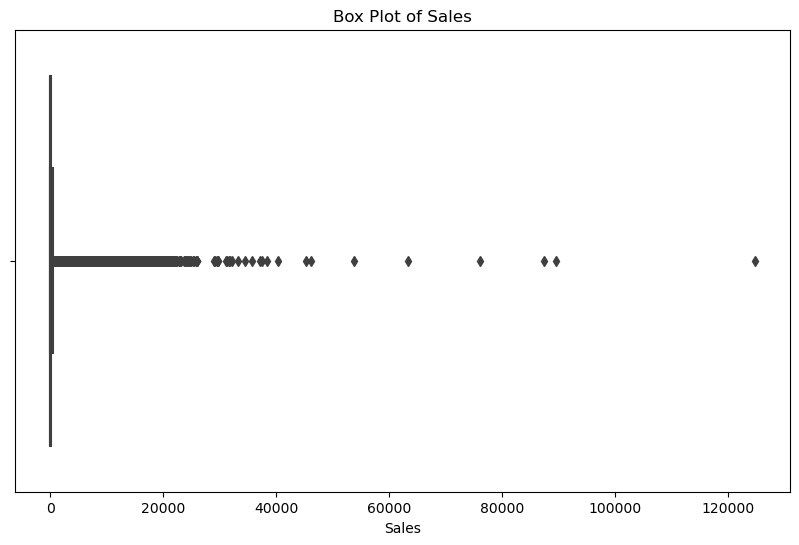

In [128]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=y)
plt.title('Box Plot of Sales')
plt.xlabel('Sales')
plt.show()

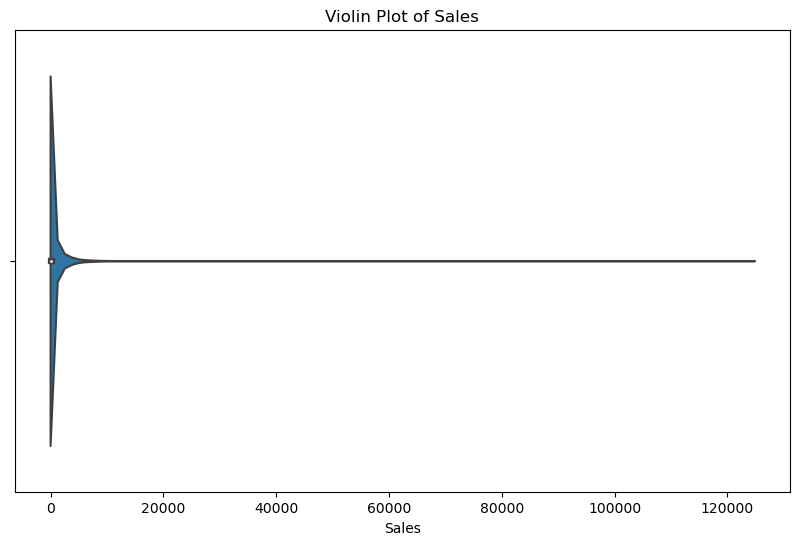

In [129]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=y)
plt.title('Violin Plot of Sales')
plt.xlabel('Sales')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


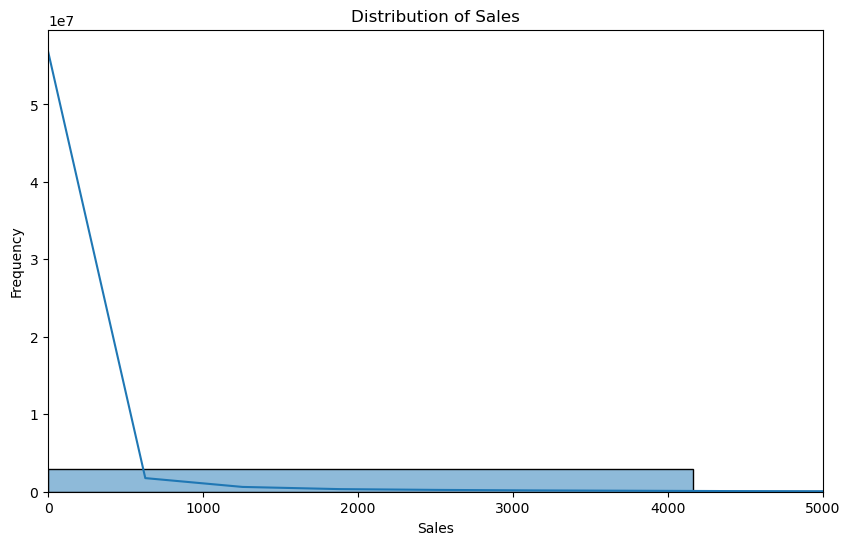

In [132]:
plt.figure(figsize=(10, 6))

# Plot histogram with specific range
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Set limits for the x-axis to focus on a specific range
plt.xlim(0, 5000)  # Replace with your desired range

plt.show()

In [134]:
percentiles = [0, 25, 50, 75, 100]

# Calculate and print the percentile values
percentile_values = np.percentile(y, percentiles)

for p, value in zip(percentiles, percentile_values):
    print(f"{p}th Percentile: {value:.2f}")

0th Percentile: 0.00
25th Percentile: 0.00
50th Percentile: 11.00
75th Percentile: 195.85
100th Percentile: 124717.00


In [135]:
percentiles = [75, 80, 85, 90, 95,100]
# Calculate and print the percentile values
percentile_values = np.percentile(y, percentiles)

for p, value in zip(percentiles, percentile_values):
    print(f"{p}th Percentile: {value:.2f}")

75th Percentile: 195.85
80th Percentile: 296.96
85th Percentile: 484.44
90th Percentile: 867.00
95th Percentile: 1965.00
100th Percentile: 124717.00


In [137]:
percentiles = [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
# Calculate and print the percentile values
percentile_values = np.percentile(y, percentiles)

for p, value in zip(percentiles, percentile_values):
    print(f"{p}th Percentile: {value:.2f}")

90th Percentile: 867.00
91th Percentile: 993.98
92th Percentile: 1148.00
93th Percentile: 1348.00
94th Percentile: 1616.00
95th Percentile: 1965.00
96th Percentile: 2406.00
97th Percentile: 2995.00
98th Percentile: 3831.00
99th Percentile: 5507.00
100th Percentile: 124717.00


In [138]:
percentiles = np.arange(99.0, 100.1, 0.1)  # 100.1 to include the 100th percentile

# Calculate the percentile values
percentile_values = np.percentile(y, percentiles)

# Print the percentile values
for p, value in zip(percentiles, percentile_values):
    print(f"{p:.1f}th Percentile: {value:.2f}")

99.0th Percentile: 5507.00
99.1th Percentile: 5802.36
99.2th Percentile: 6134.67
99.3th Percentile: 6511.00
99.4th Percentile: 6944.00
99.5th Percentile: 7448.00
99.6th Percentile: 8035.00
99.7th Percentile: 8832.56
99.8th Percentile: 10005.53
99.9th Percentile: 12076.23
100.0th Percentile: 124717.00


In [141]:
df_train.columns

Index(['onpromotion', 'year', 'month', 'day', 'dayofweek', 'family_AUTOMOTIVE',
       'family_BABY CARE', 'family_BEAUTY', 'family_BEVERAGES', 'family_BOOKS',
       'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING',
       'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN FOODS',
       'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE',
       'family_HOME AND KITCHEN I', 'family_HOME AND KITCHEN II',
       'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR',
       'family_LAWN AND GARDEN', 'family_LINGERIE', 'family_LIQUOR,WINE,BEER',
       'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE',
       'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS',
       'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD', 'family_1',
       'family_2', 'family_3', 'family_4', 'family_5', 'family_6', 'family_7',
       'family_8', 'family_9', 'family_10', 'family_11'

In [146]:
df_train.dtypes

onpromotion    int64
year           int32
month          int32
day            int32
dayofweek      int32
               ...  
family_50       bool
family_51       bool
family_52       bool
family_53       bool
family_54       bool
Length: 92, dtype: object

In [157]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 92 columns):
 #   Column                             Dtype
---  ------                             -----
 0   onpromotion                        int64
 1   year                               int32
 2   month                              int32
 3   day                                int32
 4   dayofweek                          int32
 5   family_AUTOMOTIVE                  bool 
 6   family_BABY CARE                   bool 
 7   family_BEAUTY                      bool 
 8   family_BEVERAGES                   bool 
 9   family_BOOKS                       bool 
 10  family_BREAD/BAKERY                bool 
 11  family_CELEBRATION                 bool 
 12  family_CLEANING                    bool 
 13  family_DAIRY                       bool 
 14  family_DELI                        bool 
 15  family_EGGS                        bool 
 16  family_FROZEN FOODS                bool 
 17  family_G

In [16]:
df2=oil

In [17]:
df3=stores

In [18]:
df4=transactions

In [19]:
df5=holidays_events

In [80]:
df_test=test